In [40]:
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np

In [37]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

In [38]:
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [28]:
show(mnist_testset[0])

NameError: name 'show' is not defined

In [29]:
help(mnist_testset)

Help on MNIST in module torchvision.datasets.mnist object:

class MNIST(torchvision.datasets.vision.VisionDataset)
 |  MNIST(root, train=True, transform=None, target_transform=None, download=False)
 |  
 |  `MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.
 |  
 |  Args:
 |      root (string): Root directory of dataset where ``MNIST/processed/training.pt``
 |          and  ``MNIST/processed/test.pt`` exist.
 |      train (bool, optional): If True, creates dataset from ``training.pt``,
 |          otherwise from ``test.pt``.
 |      download (bool, optional): If true, downloads the dataset from the internet and
 |          puts it in root directory. If dataset is already downloaded, it is not
 |          downloaded again.
 |      transform (callable, optional): A function/transform that  takes in an PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_transform (callable, optional): A function/transform that takes in the
 |          

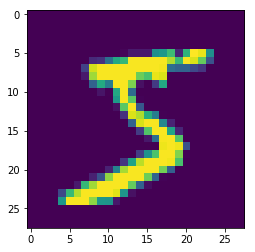

In [39]:
import matplotlib.pyplot as plt
plt.imshow(np.array(mnist_trainset[0][0].getdata()).reshape(28,28))

In [31]:
print(mnist_trainset[0][1])

5


In [32]:
raw_train_data = [np.array(x[0].getdata()) for x in mnist_trainset]
raw_test_data = [np.array(x[0].getdata()) for x in mnist_testset]

In [35]:
print(len(raw_test_data[0]))

784


In [11]:
help(mnist_trainset)

Help on MNIST in module torchvision.datasets.mnist object:

class MNIST(torchvision.datasets.vision.VisionDataset)
 |  MNIST(root, train=True, transform=None, target_transform=None, download=False)
 |  
 |  `MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.
 |  
 |  Args:
 |      root (string): Root directory of dataset where ``MNIST/processed/training.pt``
 |          and  ``MNIST/processed/test.pt`` exist.
 |      train (bool, optional): If True, creates dataset from ``training.pt``,
 |          otherwise from ``test.pt``.
 |      download (bool, optional): If true, downloads the dataset from the internet and
 |          puts it in root directory. If dataset is already downloaded, it is not
 |          downloaded again.
 |      transform (callable, optional): A function/transform that  takes in an PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_transform (callable, optional): A function/transform that takes in the
 |          

In [12]:
for x in range(len(raw_train_data)):
    for i in range(784):
        if raw_train_data[x][i] > 128:
            raw_train_data[x][i] = 1
        else:
            raw_train_data[x][i] = 0

In [13]:
for x in range(len(raw_test_data)):
    for i in range(784):
        if raw_test_data[x][i] > 128:
            raw_test_data[x][i] = 1
        else:
            raw_test_data[x][i] = 0

In [13]:
raw_train_data[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
raw_test_data[0][783]

0

In [18]:
print("shape train[0]:",np.shape(raw_train_data))
print("shape test[0]:", np.shape(raw_test_data))
print(mnist_trainset[0][1])
print(raw_train_data[0][1])


shape train[0]: (60000, 784)
shape test[0]: (10000, 784)
5
0


In [19]:
a = [1,2,3]

In [20]:
type(a)

list

In [21]:
print(type(raw_train_data))
print(type(mnist_trainset))

<class 'list'>
<class 'torchvision.datasets.mnist.MNIST'>


In [14]:
train_xy = [np.hstack( (x.getdata(),[y]) ) for x,y in mnist_trainset ]

In [15]:
train_xy1 = train_xy[0:10]

In [23]:
train_xy[0].shape

(785,)

In [17]:
for x in range(len(train_xy)):
    for i in range(784):
        if train_xy[x][i] > 128:
            train_xy[x][i] = 1
        else:
            train_xy[x][i] = 0

In [56]:
len(train_xy[0])

785

In [18]:
train_xy = np.array(train_xy).reshape(-1,785)

In [19]:
train_xy1 = train_xy[0:]

In [69]:
from spn.algorithms.LearningWrappers import learn_parametric, learn_classifier
from spn.structure.leaves.parametric.Parametric import Categorical, Gaussian
from spn.structure.Base import Context
spn_classification = learn_classifier(train_xy,
                       Context(parametric_types=[Categorical for i in range(785)]).add_domains(train_xy),
                       learn_parametric, 784)


KeyboardInterrupt: 

In [20]:
from spn.algorithms.LearningWrappers import learn_parametric, learn_classifier
from spn.structure.leaves.parametric.Parametric import Categorical, Gaussian
from spn.structure.Base import Context
spn_classification = learn_classifier(train_xy1,
                       Context(parametric_types=[Categorical for i in range(785)]).add_domains(train_xy1),
                       learn_parametric, -1)


In [21]:
from spn.io.Graphics import plot_spn
plot_spn(spn_classification, 'mnist_spn.png')

FileNotFoundError: [WinError 2] "dot" not found in path.

<Figure size 432x288 with 0 Axes>

In [22]:
from sklearn.metrics import accuracy_score
print("accuracy:")
print(accuracy_score(test_labels, predictions[:,-1:]))
print("actuals:")
print(test_labels[:10])
print("predictions:")
print(predictions[:10,-1:])

accuracy:


NameError: name 'test_labels' is not defined